<a href="https://colab.research.google.com/github/fhzhkunming/ST554_HW4/blob/main/HW4_Hui.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ST554 Homework 4

Hui Fang

2/6/2026

# Instructions
For this homework you will create a public `gitHub` repo and a python notebook (`.ipynb` file) using Google Colab. You’ll save your Google Colab document on your `gitHub` repo (check the box that says ‘Include a
link to Colab’). You’ll submit a link to your `gitHub` repo. Please make sure to change the sharing settings
so that anyone with the link can see the notebook.

The purpose of this homework is to practice summarizing data using `pandas` and `matplotlib` and do some more advanced function writing.

# Summarizing Student Data Graphically

For this part, we’ll revisit the [StudentData](https://www4.stat.ncsu.edu/online/datasets/StudentData.txt).txt data that comes from the UCI machine learning repository. Information about the [variables in the dataset can be found here](https://archive.ics.uci.edu/dataset/320/student+performance). I want you to look at the math scores data set.

You should read up on the variables. The dataset is generally about math scores (G1, G2, G3) for students from two different schools. They also measure a bunch of things about the students’ home life. Hopefully you can make some interesting connections!

# Bring in Homework 3 Code
• Copy your code and markdown cells from homework 3 that read in the data and summarized it numerically.

• We were essentially starting an EDA there.

• **Our goal is to now add to this basic EDA by including graphs that describe the variables.**

# Summarizing Data Numerically
For this part, we’ll use the StudentData.txt data (available here https://www4.stat.ncsu.edu/~online/
datasets/StudentData.txt) that comes from the UCI machine learning repository. Information about the
variables in the dataset can be found here https://archive.ics.uci.edu/ml/datasets/Student+Performance. I
want you to look at **the math scores data set**.

## Task 1: Read in the data
- You can either read this dataset from the URL or download it and read it in locally. Check out the first few observations of the data.

In [36]:
import numpy as np
import pandas as pd # import pandas module
import matplotlib.pyplot as plt # import the pyplot module and alias it as plt
math_score = pd.read_csv("https://www4.stat.ncsu.edu/~online/datasets/StudentData.txt", # read in data via URL
                         sep = ";")
math_score.head() # check the first few observations of the data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


---
## Task 2: Summarize the Data
### Categroical variables


In [37]:
# create a two-way contingency table
failure_table = pd.crosstab(
    math_score["sex"].replace({"F":"Female" , "M": "Male"}),
    math_score["failures"],
    dropna = False,
    margins = False)
failure_table

failures,0,1,2,3
sex,,,,
Female,168,23,11,6
Male,144,27,6,10


The two-way shows that among the 208 females, 168 of them never failed, 23 failed once, 11 failed twice, and 6 failed three times. Among the males, 144 never failed, 27 failed once, 6 failed twice, and 10 failed 3 times.

Text(0.5, 1.0, 'Student counts by sex and failure times')

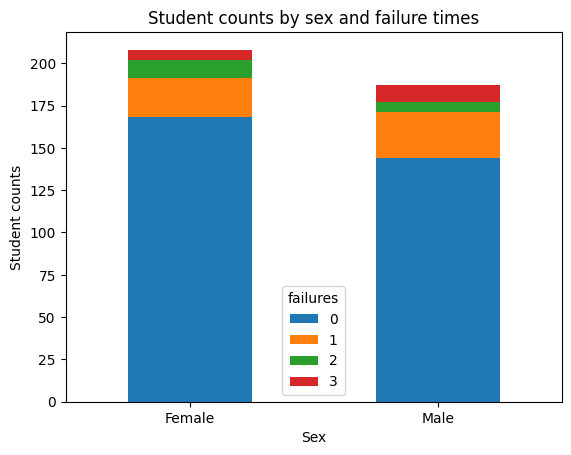

In [38]:
# Crate a stacked bar graph
failure_table.plot.bar(stacked = True, rot = 0)
plt.xticks(rotation = 0) # Keep the x-axis labels horizontally
plt.xlabel("Sex") # put x-axis label
plt.ylabel("Student counts") # put y-axis label
plt.title("Student counts by sex and failure times") # give plot title

Text(0.5, 1.0, 'Student counts by sex and failure times')

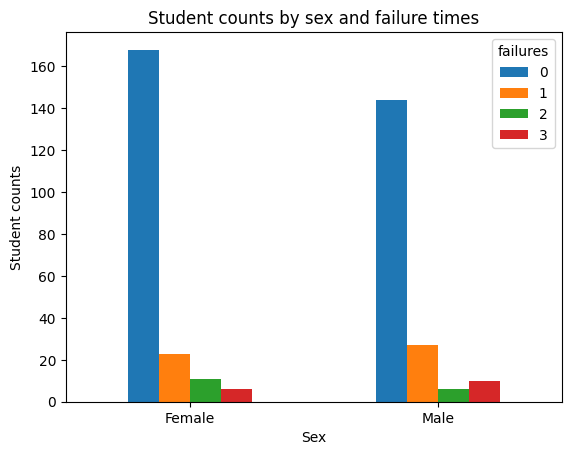

In [39]:
# create a side-by-side bar graph
failure_table.plot.bar()
plt.xticks(rotation = 0) # Keep the x-axis labels horizontally
plt.xlabel("Sex") # put x-axis label
plt.ylabel("Student counts") # put y-axis label
plt.title("Student counts by sex and failure times") # give plot title

The bar charts show that both female and male students follow the same general pattern: most students have zero failures, and the number of students decreases as the number of failures increases. However, the charts also reveal some differences between the groups. Females have slightly higher counts in the 0‑, 1‑, and 2‑failure categories, reflecting their larger overall sample size. In contrast, males have a noticeably higher count in the 3‑failures category, even though there are fewer males overall. The side‑by‑side plot makes these differences easy to compare directly, while the stacked plot highlights how strongly both distributions are dominated by students with no failures.


In [40]:
# create a three-way contingency table
pd.crosstab(
    math_score["sex"].replace({"F":"Female" , "M": "Male"}),
    [math_score["failures"],
    math_score["famsup"]],
    dropna = False,
    margins = True)

failures    0        1      2      3      All
famsup     no  yes  no yes no yes no yes     
sex                                          
Female     50  118  10  13  4   7  2   4  208
Male       65   79  15  12  1   5  6   4  187
All       115  197  25  25  5  12  8   8  395

Among female students, most of those who never failed had family support: 118 received support, compared with 50 who did not. A similar pattern appears among those who failed once, where 13 had family support and 10 did not. For students who failed twice, 7 had support and 4 did not, and among those who failed three times, 4 had support while 2 did not.

Male students show a comparable distribution. Among those who never failed, 79 had family support and 65 did not. For students who failed once, 12 had support and 15 did not. Among those who failed twice, 5 had support and 1 did not, and for those who failed three times, 4 had support while 6 did not.

The table indicates a correlation between family support and better academic outcomes.



- Create a conditional two-way table. That is, condition on one variable’s setting and create a two-way table. Do this using two different methods:

  – Once, by subsetting the data (say with `.loc`) and then creating the two-way table
  

In [41]:
math_score_nonf = math_score.loc[math_score["failures"] == 0] # subset the data with failures = 0
# create two-way contingency table with the subsetted data
pd.crosstab(
    math_score_nonf["sex"].replace({"F":"Female" , "M": "Male"}),
    math_score_nonf["failures"],
    dropna = False,
    margins = False)


failures,0
sex,
Female,168
Male,144


This table shows that for those never failed students, females performed slightly better than male. The difference suggests that female students may have a slightly higher rate of academic success in terms of avoiding failures.

In [42]:
# create a new variable named "fail_group" based on 0 failure or not
math_score["fail_group"] = math_score["failures"].apply(
    lambda x: "0 failure" if x == 0 else "1-3 failures") # use a lambda function to set two groups

# create a twy-way contingency table
fail_group_table = pd.crosstab(
    math_score["sex"].replace({"F":"Female" , "M": "Male"}),
    math_score["fail_group"])
fail_group_table

fail_group,0 failure,1-3 failures
sex,,
Female,168,40
Male,144,43


<Figure size 800x500 with 0 Axes>

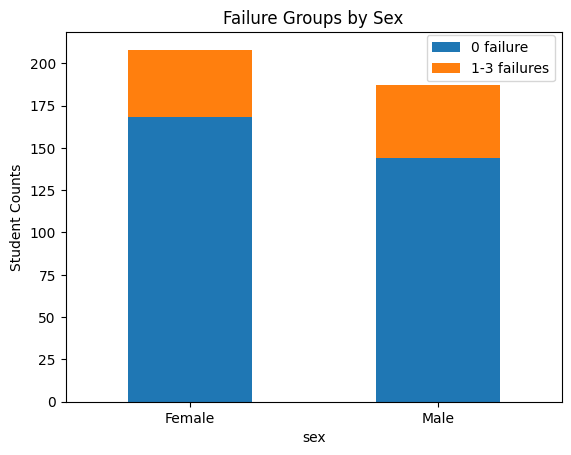

<Figure size 1000x500 with 0 Axes>

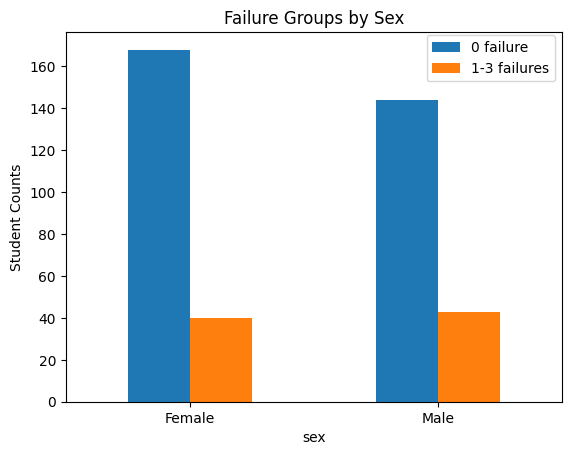

In [43]:
# Create a stacked bar chart with the failure group table
plt.figure(figsize = (8, 5))                                 # set the figure size
fail_group_table.plot.bar(stacked = True, rot = 0)           # create the stacked bar
plt.title("Failure Groups by Sex")                           # set the plot title
plt.ylabel("Student Counts")                                 # set the y-axis label
plt.legend(loc = "upper right", bbox_to_anchor = (1,1.01))   # format the legend

# Create a side-by-side chart with the failure group table
plt.figure(figsize = (10, 5))                               # set the figure size
fail_group_table.plot.bar(stacked = False, rot = 0)         # create the side-by-side bar
plt.title("Failure Groups by Sex")                          # set the plot title
plt.ylabel("Student Counts")                                # set the y-axis label
plt.legend(loc = "upper right", bbox_to_anchor = (1,1.01))  # format the legend

The two-way contingency table and the two bar plots show that among students who never failed, females (168) slightly outperform males (144). Among those with 1–3 failures, the numbers for males and females are very similar. This modest difference suggests that females may have a slightly higher rate of academic success in terms of avoiding failures.

 – Once, by creating a three-way table and subsetting it.

In [44]:
# create a three-way table
three_way = pd.crosstab(
    math_score["sex"].replace({"F":"Female" , "M": "Male"}),
    [math_score["failures"],
    math_score["famsup"]],
    dropna = False,
    margins = True)
# subset the three-way table to get a conditional two-way table
conditional_two_way = three_way.xs("yes", level = "famsup", axis = 1) # subset the three-way table for those famsup = yes
conditional_two_way

failures,0,1,2,3
sex,,,,
Female,118,13,7,4
Male,79,12,5,4
All,197,25,12,8


The table shows that among students who received family support, the majority never failed. Among the 197 students with zero failures, females (118) outperformed males (79). Among those who failed 1–3 times, the numbers for males and females are very similar. Overall, the distribution suggests that for students with family support, failure is relatively uncommon for both groups, with only small gender differences.

In [45]:
# get the mean, median, and standard deviation for age, absences, and G3 variables
math_score[['age', 'absences', 'G3']].agg(['mean','median','std', 'var'])

,age,absences,G3
mean,16.696203,5.708861,10.415190
median,17.000000,4.000000,11.000000
std,1.276043,8.003096,4.581443
var,1.628285,64.049541,20.989616


The table shows that the mean student age is 16.69, with a standard deviation of 1.27 years and a variance of 1.63. Students have an average of 5.71 absences, with a standard deviation of 8.00 and a variance of 64.05. The mean G3 score is 10.42, with a median of 11, a standard deviation of 4.58, and a variance of 20.99. There is very little variation in age, while absences vary much more widely than either age or G3.

In [46]:
math_scoreF = math_score.loc[math_score["sex"] == "F"] # subsetting the data with female students
math_scoreF[['age', 'absences', 'G3']].agg(['mean','median','std','var']) # calculate the mean, median, standard deviation, and variance

,age,absences,G3
mean,16.730769,6.216346,9.966346
median,17.000000,4.000000,10.000000
std,1.201696,9.445819,4.622338
var,1.444073,89.223500,21.366012


The table shows that among female students, age has relatively little variation, with a mean of 16.73, a standard deviation of 1.20, and a variance of 1.44. Absences show much wider variation than either age or G3. The mean G3 score is 9.97, with a median of 10 and a standard deviation of 4.62, indicating moderate spread in final grades.

- Find measures of center and spread across a single grouping variable for three of these variables
(including G3 as one of them)

In [47]:
# use the groupby() function to compute the mean, median, standard deviation, and variance for age, absences, and G3 groupped by family support.
math_score.groupby("famsup")[['age', 'absences', 'G3']] \
.agg(['mean','median','std', 'var'])

age                             absences                   \
             mean median       std       var      mean median       std   
famsup                                                                    
no      16.921569   17.0  1.330460  1.770124  5.464052    4.0  8.398799   
yes     16.553719   16.0  1.221865  1.492953  5.863636    4.0  7.756272   

                          G3                              
              var       mean median       std        var  
famsup                                                    
no      70.539818  10.640523   11.0  4.636262  21.494926  
yes     60.159751  10.272727   11.0  4.550318  20.705394

The table shows the mean, median, standard deviation, and variance of age, absences, and final grade (G3) grouped by family support. The values for students with and without family support are very similar across all three variables. Students with family support are slightly younger on average, while absences and G3 scores differ only minimally between the two groups.

- Find measures of center and spread across two grouping variables for three of these variables (including
G3 as one of them)

In [48]:
# calculate the center and spread across 'famsup' (family support) and 'sex' for age, absences, and G3.
math_score.groupby(["famsup", math_score["sex"] \
                    .replace({"F": "Female", "M": "Male"})])[['age', 'absences', 'G3']] \
                    .agg(['mean','median','std', 'var'])

age                             absences         \
                    mean median       std       var      mean median   
famsup sex                                                             
no     Female  16.969697   17.0  1.227501  1.506760  6.848485    4.0   
       Male    16.885057   17.0  1.409480  1.986635  4.413793    3.0   
yes    Female  16.619718   17.0  1.177402  1.386275  5.922535    4.0   
       Male    16.460000   16.0  1.282516  1.644848  5.780000    4.0   

                                             G3                              
                     std         var       mean median       std        var  
famsup sex                                                                   
no     Female  11.109583  123.422844  10.363636   11.0  4.818670  23.219580  
       Male     5.366892   28.803528  10.850575   11.0  4.509754  20.337878  
yes    Female   8.591662   73.816652   9.781690   10.0  4.533745  20.554840  
       Male     6.426869   41.304646  10.970000   11.0  4.504666  20.292020

The table shows the center and spread of age, absences, and final grade (G3) across family support and gender. Within each gender, the values for students with and without family support are very similar across all three variables. Among students without family support, males have fewer absences on average than females. The mean final grade is slightly higher for males than females regardless of family support. What stands out is that family support does not appear to meaningfully change age, absences, or G3 within either gender, suggesting that gender differences are more noticeable than family‑support differences in this subset.

- Create a correlation matrix between all of the numeric variables

In [49]:
# calculate the correlation matrix between all the five numeric variables
math_score[["age", "absences", "G1", "G2", "G3"]].corr()

,age,absences,G1,G2,G3
age,1.000000,0.175230,-0.064081,-0.143474,-0.161579
absences,0.175230,1.000000,-0.031003,-0.031777,0.034247
G1,-0.064081,-0.031003,1.000000,0.852118,0.801468
G2,-0.143474,-0.031777,0.852118,1.000000,0.904868
G3,-0.161579,0.034247,0.801468,0.904868,1.000000


Age is weakly negatively correlated with all three grade measures (G1, G2, and G3). Absences show almost no relationship with any of the grades, with correlations very close to zero. The strongest pattern in the table is the high positive correlation among G1, G2, and G3, indicating that earlier grades strongly predict later performance.

## Numeric variables (and across groups)

The numeric variables are age, absences, and the three test grades variables (G1, G2, and G3).

- Create a histogram, kernel density plot, and boxplot for two of the numeric variables across one of the categorical variables (that is, create graphs that can compare the distributions across the groups). For at least one of the kernel density plots across groups, make sure that the graphs are overlayed on the same plot. Add appropriate labels and titles.

- Create two scatterplots relating G3 to other numeric variables (G3 on the y-axis). Color the points by a categorical variable in each. Add appropriate labels and titles.

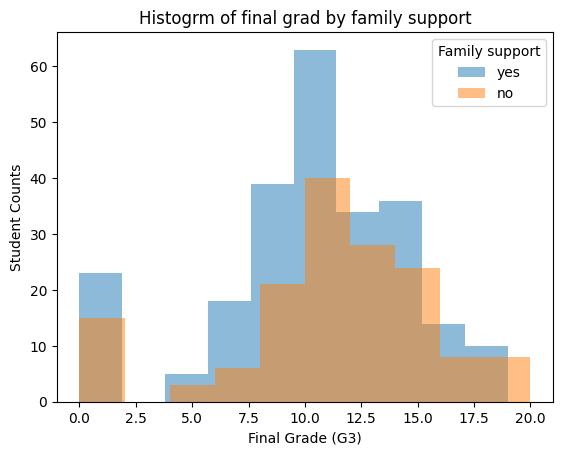

In [50]:
# create a histogram for G3 with family support
bins = 10 # set the bin size
 # plot G3 for students WITH family support
math_score[math_score["famsup"] == "yes"]["G3"].plot.hist(bins = bins, alpha = 0.5, label = "yes")
#plot G3 for students WITHOUT family support
math_score[math_score["famsup"] == "no"]["G3"].plot.hist(bins = bins, alpha = 0.5, label = "no")
plt.xlabel("Final Grade (G3)")                           # label the x-axis
plt.ylabel("Student Counts")                             # label the y-axis
plt.title("Histogrm of final grad by family support")    # title the plot
legend = plt.legend()                                    # create the legend
legend.set_title("Family support")                       # add a title to the legend

The histogram shows the distribution of final grades (G3) for students with and without family support. Students with family support appear more frequently in the middle-grade range, especially around scores 9 - 11. Both groups have similar overall shapes, but the “yes” group has slightly higher counts across most final grades, suggesting that students with family support are more common in the dataset and cluster around average performance.

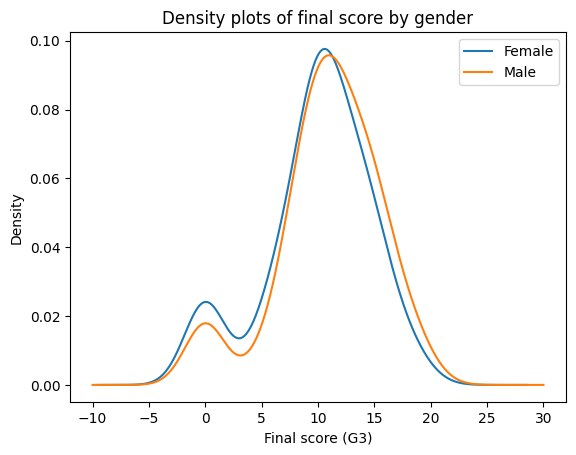

In [51]:
# Create a kernel density plot females
math_score[math_score["sex"] == "F"]["G3"].plot.density(bw_method = 0.4, label = "Female")
# Create a kenel density plot for males
math_score[math_score["sex"] == "M"]["G3"].plot.density(bw_method = 0.4, label = "Male")
plt.title("Density plots of final score by gender")     # add a plot title
plt.xlabel("Final score (G3)")                          # label the x-axis
plt.legend()                                            # show the legend

The density plot shows the distribution of final grades (G3) for male and female students. The two curves have very similar shapes, indicating that the grade distributions for males and females are nearly the same. Both groups peak around the middle-grade range, and neither group shows noticeably higher or lower performance across the distribution.

Text(0.5, 0, 'Family Support')

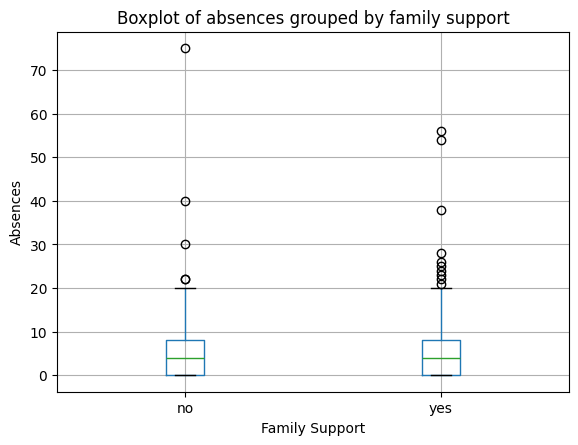

In [52]:
# create a box plot
math_score.boxplot(column = ["absences"], by = "famsup")   # create the box plot
plt.suptitle("")                                           # remove the automatic pandas title
plt.title("Boxplot of absences grouped by family support") # add plot title
plt.ylabel("Absences")                                     # label the y-axis
plt.xlabel("Family Support")                               # label the x-axis

The boxplot compares absences for students with and without family support. The two groups have very similar medians and interquartile ranges, indicating that typical absence levels do not differ much by family support. The main difference appears in the spread of extreme values: the group with family support shows more high-absence outliers, suggesting that while most students behave similarly, a small number of students with family support have unusually high absence counts.

<Axes: title={'center': 'Scatter plots for G2 and G3 by sex'}, xlabel='G2', ylabel='G3'>

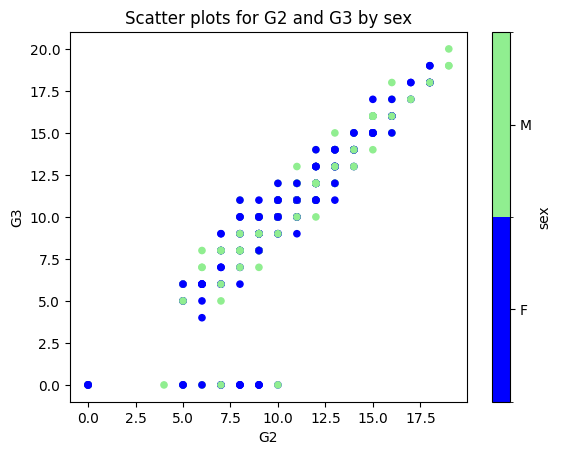

In [53]:
# create a scatter plot for G2 vs G3
from matplotlib.colors import ListedColormap                # import tool for creating custom colormaps
math_score["sex"] = math_score["sex"].astype("category")    # convert sex variable to category
math_score.plot.scatter(                                    # creat scatter plot
    x = "G2",                                               # label x-axis
    y = "G3",                                               # label y-axis
    c ="sex",                                               # color points by sex
    cmap = ListedColormap(["blue", "lightgreen"]),          # set two-color scheme for category
    title = "Scatter plots for G2 and G3 by sex")           # add a plot title

The scatter plot shows the relationship between G2 and G3, separated by sex. The points form a clear upward trend, indicating a strong linear relationship: students with higher G2 scores tend to also have higher final grades (G3). The two sex groups overlap almost completely, suggesting that sex does not meaningfully change the relationship between G2 and G3.

<Axes: title={'center': 'Scatter plots for final grade vs absences'}, xlabel='absences', ylabel='G3'>

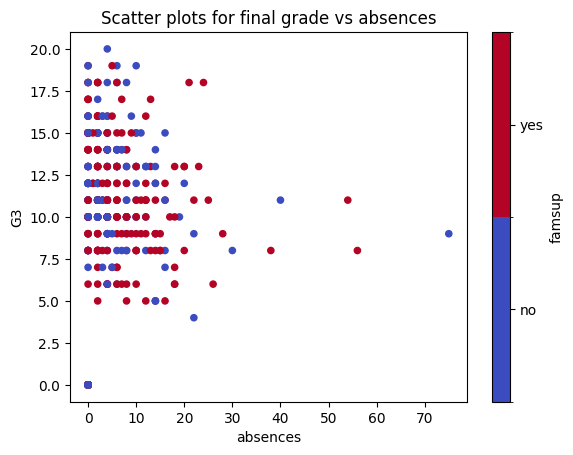

In [54]:
# create a scotter plot for G3 vs absences
math_score["famsup"] = math_score["famsup"].astype("category") # convert famsup variable to category
math_score.plot.scatter(                                       # create scatter plot
    x = "absences",                                            # label x-axis
    y = "G3",                                                  # label y-axis
    c ="famsup",                                               # color points by family support (famsup)
    cmap = "coolwarm",                                         # two-color scheme for categories
    title = "Scatter plots for final grade vs absences")       # add a plot title

The scatter plot shows the relationship between final grade (G3) and absences, separated by family support (famsup). There is a clear negative relationship: students with more absences tend to have lower final grades. The two family-support groups overlap heavily, indicating that family support does not create a strong difference in the overall pattern. Both groups follow the same downward trend, suggesting that absences are a more important factor than family support in predicting final performance.

# Plotting the NFL Data

For this part we'll read in the NFL Box Score data that we read in class videos. [The data is available here](www4.stat.ncsu.edu/~online/datasets/scoresFull.csv).

You may not be familiar with (American) football, but each row of this dataset represents information about one particular game. The most important thing is the score for the home and away teams (`AQ1`, . . . , `AFinal`, `HQ`, . . . , `HFinal`). Other variables like yards gained (passing or rushing or combined) can be good indicators of score. Things like turnovers, penalties, etc. can also be indicators of how the game went.

## Task 1: Read in the data
• You can either read this dataset from the URL or download it and read it in locally. Check out the first few observations of the data.

• Convert the `homeTeam, awayTeam, day, stadium, startTime, toss, roof`, and `surface` to `category` type variables.

In [55]:
# Readin data
import numpy as np
import pandas as pd
nlf_data = pd.read_csv("https://www4.stat.ncsu.edu/~online/datasets/scoresFull.csv")        # readin data via url
args = ["homeTeam", "awayTeam", "day", "stadium", "startTime", "toss", "roof", "surface"]   # make a list of variables need to be converted to category type
nlf_data[args] = nlf_data[args].astype("category")                                          # convert the vaiables to category type
nlf_data.head()                                                                             # check the fist several observations of each variable

,week,date,day,season,awayTeam,AQ1,AQ2,AQ3,AQ4,AOT,...,homeFumLost,homeNumPen,homePenYds,home3rdConv,home3rdAtt,home4thConv,home4thAtt,homeTOP,HminusAScore,homeSpread
0,1,5-Sep,Thu,2002,San Francisco 49ers,3,0,7,6,-1,...,0,10,80,4,8,0,1,32.47,-3,-4.0
1,1,8-Sep,Sun,2002,Minnesota Vikings,3,17,0,3,-1,...,1,4,33,2,6,0,0,28.48,4,4.5
2,1,8-Sep,Sun,2002,New Orleans Saints,6,7,7,0,6,...,0,8,85,1,6,0,1,31.48,-6,6.0
3,1,8-Sep,Sun,2002,New York Jets,0,17,3,11,6,...,1,10,82,4,8,2,2,39.13,-6,-3.0
4,1,8-Sep,Sun,2002,Arizona Cardinals,10,3,3,7,-1,...,0,7,56,6,10,1,2,34.40,8,6.0


## Task 2: Summarize the data
• I want you to look at some trends during the regular season. This means you should remove any data where the week is not 1 through 17.

• You should summarize some of the variables grouped by season and week, season alone, and week alone (three different scenarios).

  – Produce some common numeric summaries of variables across these different groups.

  – Similarly, produce some common plots over time (mostly line plots I’d think!)

• Write at least one function that can be used to easily create a plot for this data.

  – For instance, you might have a function that takes in a numeric variable and a statistic (or a categorical variable, etc.). Then the function plots the average (or some other statistic) of the numeric variable across the seasons.

  – This is just an example! You get to decide what might be useful to do here.

  – Add in type hints for the inputs (`pd.DataFrame` was one I used) using **annotations** in the function definition.

  – Don’t worry about type hinting the output. If you are interested, something like this could work. . .

  – Add the timeit decorator used in the class notes as well so information is printed out about how long the code took to run.

  – Run this function with three different settings of inputs (to obtain three different graphs of the same type - or whatever it is your function does!)

**After each graph, you should discuss what is interesting about it or what it tells you!**

In [56]:
# remove any data where the week is not 1 through 17
nlf_data = nlf_data[nlf_data["week"].str.isnumeric()]         # keep only rows where week is numeric
nlf_data["week"] = nlf_data["week"].astype(int)               # convert week to integer
nlf_data_sub = nlf_data[nlf_data["week"].isin(range(1, 18))]  # filter weeks 1–17
nlf_data_sub["week"].unique()                                 # check the reults


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

    - Produce some common numeric summaries of variables across these different groups.

In [72]:
# summarize important variables grouped by season and week
summary_vars = ["AFinal", "HFinal", "AtotalYds", "HtotalYds", "Aturnovers", "Hturnovers"] # list the variables to summarize
summary_stats = ["mean","median","std"]                                                   # list the statistics to get
summary_sw = nlf_data_sub.groupby(["season", "week"])[summary_vars].agg(summary_stats)    # simmarize the choosen vars grouped by season and week
summary_sw

AFinal                       HFinal                    \
                  mean median        std       mean median        std   
season week                                                             
2002   1     23.125000   23.0   9.680737  26.125000   27.0  11.050641   
       2     22.687500   23.5  12.354318  18.187500   16.5  10.387292   
       3     19.571429   22.0  11.765100  24.428571   27.0  11.460395   
       4     18.928571   19.0   8.939663  28.285714   27.0  14.187907   
       5     24.000000   23.0  10.355229  23.214286   25.5   8.441460   
...                ...    ...        ...        ...    ...        ...   
2014   13    20.687500   20.0   9.470788  27.312500   27.5  14.012940   
       14    27.062500   24.5   9.698582  19.750000   19.0  10.908712   
       15    18.000000   13.5   8.899438  18.437500   18.0   9.750000   
       16    22.875000   22.0  10.052363  22.937500   23.0  11.227756   
       17    20.812500   17.0  11.438058  20.500000   20.0  10.013324   

              AtotalYds                      HtotalYds                     \
                   mean median         std        mean median         std   
season week                                                                 
2002   1     310.000000  286.0   70.386552  348.625000  352.0   78.037491   
       2     340.937500  352.0  109.556968  306.812500  285.0   88.100109   
       3     299.214286  303.0   86.951957  322.571429  324.0   88.114187   
       4     344.071429  351.0   74.429589  346.857143  362.0   82.449852   
       5     379.571429  385.0   78.271435  341.571429  329.5   71.469966   
...                 ...    ...         ...         ...    ...         ...   
2014   13    346.375000  329.0   63.075484  347.375000  337.0  126.749030   
       14    392.437500  399.5   83.313839  308.937500  308.0   97.754433   
       15    327.375000  335.0   57.902073  301.625000  289.0   74.995000   
       16    368.625000  362.0  111.791994  324.375000  320.5   92.401930   
       17    330.687500  325.0   86.533784  349.187500  356.0   81.769773   

            Aturnovers                  Hturnovers                   
                  mean median       std       mean median       std  
season week                                                          
2002   1      1.625000    1.0  1.258306   1.562500    1.0  1.093542  
       2      1.562500    1.0  1.209339   2.000000    2.0  1.460593  
       3      2.642857    3.0  1.150728   1.571429    1.0  1.741542  
       4      3.000000    3.0  1.176697   1.285714    1.0  0.994490  
       5      1.571429    1.5  1.222500   2.000000    1.0  1.881080  
...                ...    ...       ...        ...    ...       ...  
2014   13     1.875000    1.5  1.500000   1.312500    1.0  1.195478  
       14     1.437500    1.5  1.263263   1.437500    2.0  1.030776  
       15     1.062500    1.0  0.928709   1.437500    1.0  0.813941  
       16     1.562500    1.0  1.314978   1.500000    1.0  1.154701  
       17     1.500000    1.0  1.211060   1.375000    1.0  1.204159  

[221 rows x 18 columns]

This table shows selected variables grouped by season and week. Across the regular season of 2002, home teams tend to score slightly more points and gain more total yards than away teams. Scoring and yardage both fluctuate from week to week, with early-season weeks showing wider variation than later weeks. Turnovers are more irregular, but away teams often commit slightly more than home teams. Weeks with higher average total yards generally align with higher average final scores, while weeks with more turnovers tend to show lower scoring for both teams.

In [73]:
# simmarize the choosen vars grouped by season
summary_season = nlf_data_sub.groupby(["season"])[summary_vars].agg(summary_stats)
summary_season

AFinal                       HFinal                     AtotalYds  \
             mean median        std       mean median        std        mean   
season                                                                         
2002    20.550781   20.5  10.064759  22.796875   23.0  10.182152  324.199219   
2003    19.054688   19.0  10.251970  22.609375   23.0  10.119470  306.582031   
2004    20.230469   19.0  10.175596  22.738281   23.0  10.400502  320.578125   
2005    18.792969   19.0   9.948894  22.441406   21.0   9.797383  307.968750   
2006    20.234375   21.0  10.386254  21.082031   20.0   9.856475  316.628906   
2007    20.253906   20.0  10.703215  23.121094   22.0  10.568033  322.847656   
2008    20.750000   20.0  10.420944  23.308594   24.0  10.454499  319.437500   
2009    20.363281   20.0  10.672526  22.570312   23.0  10.666557  323.101562   
2010    21.089844   20.0  10.288187  22.984375   23.0  10.251339  329.386719   
2011    20.546875   20.0   9.634789  23.812500   23.0  10.524109  340.851562   
2012    21.539062   21.5  10.404676  23.972656   23.0  10.559413  345.343750   
2013    21.855469   21.0   9.664500  24.960938   24.0  10.533534  339.761719   
2014    21.343750   21.0   9.877634  23.832031   23.0  10.954053  344.750000   

                           HtotalYds                   Aturnovers         \
       median        std        mean median        std       mean median   
season                                                                     
2002    328.0  90.834796  332.519531  335.0  82.266852   1.894531    2.0   
2003    309.5  88.547058  330.015625  326.0  74.658436   1.800781    2.0   
2004    318.0  91.992166  333.742188  328.0  86.152646   1.789062    2.0   
2005    304.0  82.493868  323.871094  320.0  81.718137   1.816406    2.0   
2006    323.5  79.583616  327.597656  328.0  84.261487   1.742188    2.0   
2007    327.0  82.786355  327.589844  322.5  79.281923   1.828125    2.0   
2008    318.0  87.103882  335.062500  338.5  80.735273   1.632812    1.0   
2009    321.0  86.549303  347.171875  346.0  90.055243   1.777344    2.0   
2010    327.0  88.937050  342.707031  350.5  79.137682   1.714844    1.0   
2011    335.5  87.176997  352.816406  350.5  81.981595   1.687500    1.0   
2012    349.5  88.730297  349.058594  343.5  87.358628   1.589844    1.0   
2013    341.5  83.462108  357.195312  352.0  88.721468   1.625000    1.0   
2014    344.5  82.916637  351.535156  346.5  87.269061   1.445312    1.0   

                 Hturnovers                   
             std       mean median       std  
season                                        
2002    1.328647   1.726562    1.0  1.459061  
2003    1.429164   1.757812    2.0  1.440295  
2004    1.409505   1.742188    2.0  1.381934  
2005    1.455714   1.683594    1.0  1.407781  
2006    1.404453   1.761719    2.0  1.431392  
2007    1.398090   1.757812    1.0  1.381934  
2008    1.371252   1.472656    1.0  1.223637  
2009    1.380975   1.628906    1.0  1.289089  
2010    1.397734   1.644531    1.0  1.423407  
2011    1.396073   1.472656    1.0  1.174581  
2012    1.351736   1.523438    1.0  1.436034  
2013    1.377693   1.550781    1.0  1.273162  
2014    1.209820   1.515625    1.0  1.252351

This table shows the selected variables grouped by season. Across seasons, home teams consistently score slightly more points than away teams, and this advantage appears in every year. Total yards show a gradual upward trend over time for both teams, with home offenses generally gaining more yards than away offenses. Turnovers decline modestly across seasons, especially for away teams, suggesting cleaner play in later years. Variation in scoring, yardage, and turnovers remains fairly stable from season to season, with no single year showing unusually large swings.

In [75]:
s# immarize the choosen vars grouped by week
summary_week = nlf_data_sub.groupby(["week"])[summary_vars].agg(summary_stats)
summary_week

AFinal                       HFinal                     AtotalYds  \
           mean median        std       mean median        std        mean   
week                                                                         
1     19.716346   20.0   8.977768  22.139423   20.5  10.595541  320.735577   
2     19.545894   20.0  10.433170  22.840580   23.0   9.842384  314.980676   
3     20.767677   23.0   9.634781  22.646465   23.0  10.153955  332.656566   
4     20.983696   20.0  10.062361  24.092391   23.0  10.874704  332.793478   
5     20.527473   20.5  10.300824  24.324176   24.0  10.158379  330.945055   
6     20.679558   20.0  10.270079  22.988950   23.0   9.254422  337.961326   
7     21.111111   20.0  10.674927  23.338889   23.0  10.948924  329.100000   
8     20.151685   20.0   9.782639  23.359551   23.0  10.573121  320.230337   
9     22.146067   23.0   9.701244  22.258427   21.5   9.152849  335.887640   
10    21.543011   21.0  10.015705  22.983871   23.0  10.753491  326.854839   
11    19.592040   19.0  10.017122  22.582090   22.0  10.326397  323.935323   
12    21.507317   21.0  10.795160  22.878049   21.0  10.035220  332.468293   
13    20.437500   20.0  10.131786  23.201923   23.0  10.579700  331.875000   
14    19.394231   20.0  10.203171  24.605769   24.0  11.453682  314.423077   
15    20.942308   20.0  11.224393  22.543269   21.0  10.288498  325.033654   
16    20.802885   20.0  10.330041  22.168269   21.0  11.019331  322.504808   
17    19.235577   19.0  10.637064  23.807692   23.0  10.339247  318.192308   

                         HtotalYds                   Aturnovers         \
     median        std        mean median        std       mean median   
week                                                                     
1     315.5  81.853659  330.889423  327.5  82.716980   1.716346    1.0   
2     311.0  85.701217  350.995169  346.0  85.862415   1.681159    1.0   
3     328.5  87.727388  342.272727  345.0  83.599519   1.656566    1.0   
4     338.0  84.228941  347.940217  346.5  81.354595   1.836957    2.0   
5     325.5  88.808300  341.417582  339.5  86.482849   1.791209    2.0   
6     344.0  84.424744  338.535912  334.0  81.232828   1.718232    2.0   
7     330.0  87.076034  329.977778  328.0  80.208803   1.750000    2.0   
8     324.5  85.184265  342.258427  348.0  89.610145   1.662921    1.0   
9     340.0  81.766436  336.252809  330.5  86.154756   1.573034    1.0   
10    322.5  92.497804  338.612903  337.0  85.216168   1.698925    1.0   
11    334.0  86.632793  343.457711  338.0  79.433931   1.731343    1.0   
12    330.0  89.936062  340.107317  335.0  83.113838   1.775610    2.0   
13    331.5  85.571530  337.456731  340.0  85.311411   1.855769    2.0   
14    316.0  95.679840  344.197115  340.0  81.764447   1.884615    2.0   
15    322.5  84.601903  331.389423  331.5  80.085506   1.658654    1.0   
16    324.0  88.325485  335.100962  335.5  91.278860   1.586538    1.0   
17    320.5  86.857880  337.389423  334.0  84.165682   1.634615    1.5   

               Hturnovers                   
           std       mean median       std  
week                                        
1     1.418076   1.682692    2.0  1.279828  
2     1.395131   1.574879    1.0  1.411790  
3     1.243555   1.712121    1.5  1.345402  
4     1.408617   1.625000    1.0  1.357282  
5     1.338066   1.620879    1.0  1.384286  
6     1.379674   1.707182    1.0  1.357041  
7     1.389807   1.583333    1.0  1.369561  
8     1.335680   1.483146    1.0  1.415111  
9     1.247711   1.578652    1.0  1.334884  
10    1.472523   1.741935    2.0  1.342875  
11    1.321916   1.597015    1.0  1.285220  
12    1.410184   1.668293    1.0  1.440731  
13    1.403366   1.701923    1.0  1.423609  
14    1.661195   1.572115    1.0  1.268188  
15    1.370434   1.610577    1.0  1.463661  
16    1.304845   1.778846    2.0  1.281279  
17    1.315516   1.519231    1.0  1.311272

This table shows the selected variables grouped by week. Across Weeks 1-17, home teams consistently score slightly more points than away teams, and they also tend to gain more total yards. Both scoring and yardage remain fairly stable across the season, with only modest week-to-week fluctuations. Turnovers show more irregular variation, but away teams generally commit slightly more than home teams. Weeks with higher average total yards usually correspond to higher average final scores, while weeks with higher turnover averages tend to show lower scoring for both teams.

 -Produce some common plots over time

Text(0.5, 1.0, 'Plot of Mean AFinal and HFinal by Week')

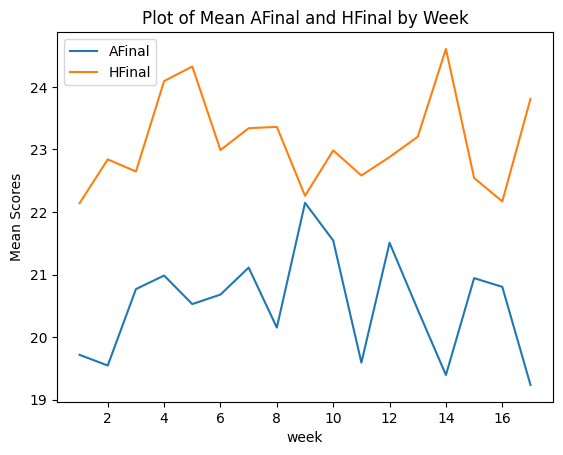

In [94]:
# Plot the mean final scores (away vs. home) across weeks 1–17
nlf_data_sub.groupby(["week"])[["AFinal","HFinal"]].mean().plot()
plt.ylabel("Mean Scores")                                         # label the y-axis
plt.title("Plot of Mean AFinal and HFinal by Week")               # add a plot title

The plot shows the average final scores for away and home teams across Weeks 1-17. Home teams consistently score slightly more than away teams throughout the season. Both lines show moderate week-to-week fluctuation, with home scoring peaking around Weeks 4-6 and again near Week 14. Away scoring rises slightly around Weeks 8-10 but remains below home scoring at nearly every point. Overall, the plot highlights a stable home-field scoring advantage across the regular season.

Text(0.5, 1.0, 'Plot of Mean AtotalYds and HtotalYds by Week')

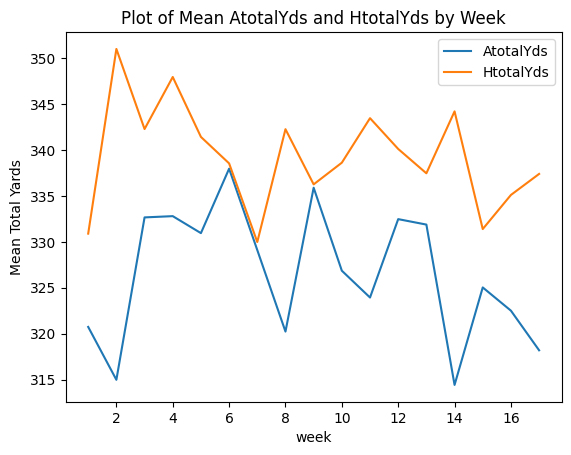

In [93]:
# Plot the mean total yards (away vs. home) across weeks 1–17
nlf_data_sub.groupby(["week"])[["AtotalYds","HtotalYds"]].mean().plot()
plt.ylabel("Mean Total Yards")
plt.title("Plot of Mean AtotalYds and HtotalYds by Week")

The plot shows the average total offensive yards gained by away and home teams across Weeks. Home teams generally gain slightly more yards than away teams throughout the season. Both lines fluctuate from week to week, with home teams reaching a high point around Week 2 and away teams peaking near Week 6. Despite these variations, the two lines follow a similar overall pattern, suggesting that offensive production for both home and away teams changes in parallel over the course of the regular season.

Text(0.5, 1.0, 'Mean Aturnover and Hturnover by Week')

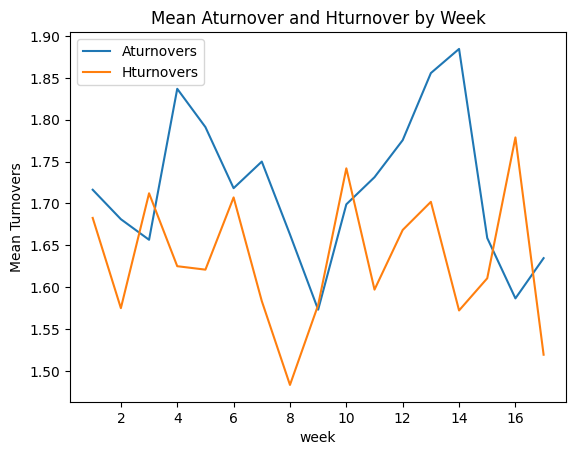

In [96]:
# Plot the mean turnovers (away vs. home) across weeks 1–17
nlf_data_sub.groupby(["week"])[["Aturnovers","Hturnovers"]].mean().plot()
plt.ylabel("Mean Turnovers")
plt.title("Mean Aturnover and Hturnover by Week")

The plot shows the average number of turnovers committed by away and home teams across Weeks 1-17. Away teams consistently commit slightly more turnovers than home teams throughout the season. Both lines fluctuate from week to week, with noticeable increases for away teams around Weeks 4 and 13, while home teams reach their lowest turnover average near Week 8. Overall, the pattern suggests that away teams tend to make more possession-losing mistakes, and turnover levels vary moderately across the regular season.

- Write at least one function that can be used to easily create a plot for this data.

In [119]:
# import modules
import time
from functools import wraps
import pandas as pd
import matplotlib.pyplot as plt

# Create a timing decorator
def timeit(func):
    """
    Measure and print the execution time of a function.
    """
    @wraps(func)                                                # Preserve the wrapped function's name and docstring
    def wrapper(*args, **kwargs):                               # Accept any positional and keyword arguments
        start = time.perf_counter()                             # Record start time
        result = func(*args, **kwargs)                          # Call the original function and store its return value
        end = time.perf_counter()                               # Record end time
        elapsed = end - start                                   # Compute total runtime
        print(f"{func.__name__} ran in {elapsed:.6} seconds")   # Display timing information
        return result                                           # Return the original function's output unchanged
    return wrapper                                              # Return the wrapper so it replaces the original function

In [116]:
# create a line plot function
@timeit
def line_plot(df: pd.DataFrame, time: str, *vars: str) -> None:
    """
    Plot the mean of one or more numeric variables across a time variable.
    The function groups the DataFrame by a time column (either 'week' or 'season'),
    computes the mean of the selected variables, and produces a line plot showing
    how these means change over time.
    Parameters
    df: pd.DataFrame, the input dataset containing the time variable and numeric variables.
    time: str, the column name representing time ('week' or 'season').
    *vars: str, one or more numeric variable names to plot.
    """
    grouped = df.groupby(time)[list(vars)].mean()         # group the dataframe by time and compute mean of selected variables
    grouped.plot()                                        # create line plot
    plt.ylabel("Mean Value")                              # label y-axis
    plt.title(f"Plot of mean {' '.join(vars)} by {time}") # add a plot title
    plt.show()                                            # show the plot


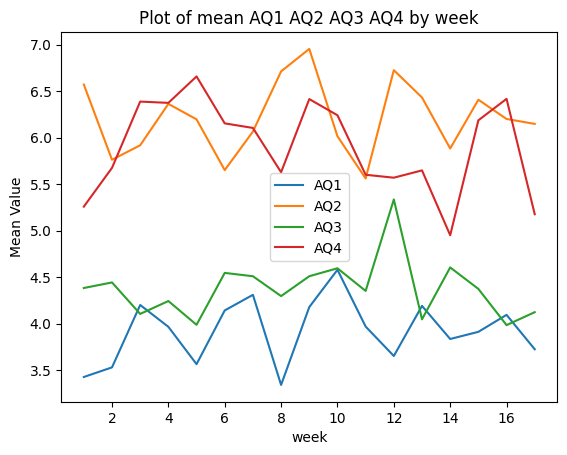

line_plot ran in 0.247219 seconds


In [120]:
# test the function with AQ1 through AQ4 by week
line_plot(nlf_data_sub, "week", "AQ1","AQ2", "AQ3", "AQ4")

The mean values of AQ2 and AQ4 are consistently higher than AQ1 and AQ3 across the season, suggesting that the away team tends to score more in the second and fourth quarters. All four quarters show week-to-week fluctuation, but the relative ordering of the quarters stays stable, which implies a consistent scoring pattern for away teams throughout the season.

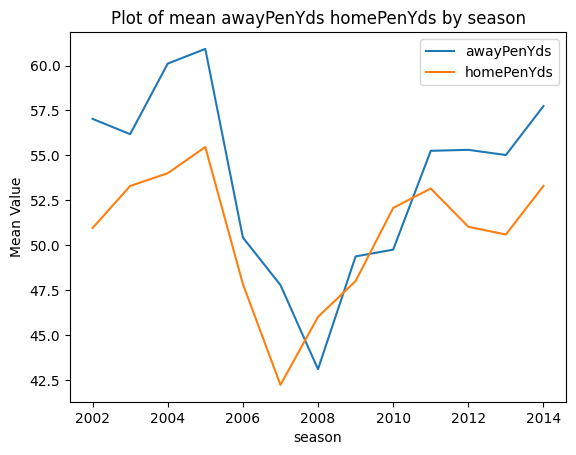

line_plot ran in 0.21043 seconds


In [121]:
# test the function with awayPenYds and homePenYdsby by season
line_plot(nlf_data_sub, "season", "awayPenYds", "homePenYds")

The away team consistently has more mean penalty yards than the home team across seasons, suggesting that away teams tend to commit more costly mistakes or are penalized more often on the road. Both lines follow a very similar pattern over time, The lowest penalty-yard seasons differ slightly (2007 for home teams and 2008 for away teams), but overall the two trends move together, showing that penalty behavior is fairly stable across seasons.

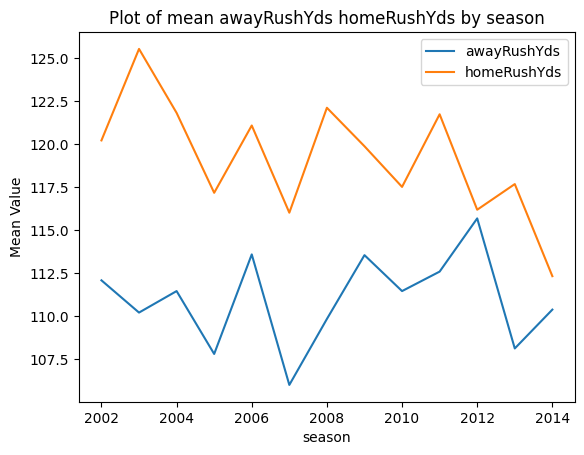

line_plot ran in 0.219126 seconds


In [130]:
# test function with awayPenYds and homePenYds by season
line_plot(nlf_data_sub, "season", "awayRushYds", "homeRushYds")

The home team consistently gains more rushing yards than the away team across seasons, suggesting that home-field advantage may play a role in rushing performance—possibly through crowd support, familiarity with field conditions, or more favorable game scripts. Both lines fluctuate from season to season, but they move in a similar pattern. The persistent gap between the two lines highlights that rushing success tends to favor the home team over time.